# plotear número de búsquedas por mes para los aeropuertos de Málaga, Barcelona y Madrid

In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# importamos GeoBases
from GeoBases import GeoBase

In [3]:
# creo q es equivalente a los import del principio ...
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [142]:
# importar el csv 
# pandas lo importa aunque esté comprimido
df=pd.read_csv("searches.csv.bz2",sep='^',usecols=['Date','Destination'],nrows=1e5,parse_dates=['Date'])

#df=pd.read_csv("searches.csv.bz2",sep='^',usecols=['Date','Destination'],parse_dates=['Date'])

# 1e5 = 100000

In [141]:
df.sample(15)

,Date,Destination
3119981,2013-09-05,EWR
9462143,2013-05-08,YQX
20323193,2013-08-07,LAX
15510698,2013-03-15,LCA
15251584,2013-06-23,TOS
3091138,2013-08-08,JFK
18914037,2013-09-03,PIT
10334161,2013-10-10,NAP
4845198,2013-06-28,MUC
20196094,2013-04-02,TCI


In [143]:
df.Date[1]

Timestamp('2013-01-01 00:00:00')

In [140]:
# vuelvo a hacer el pd.read.csv con la clausula parse_date, ahora es un timestamp
df.Date[1]

'2013-01-01'

In [144]:
df.Date[1].month

1

In [145]:
cond=(df.Destination=='MAD')|(df.Destination=='BCN')|(df.Destination=='AGP')

# tb se puede hacer con Destination.isin(['MAD','BCN','AGP])

In [146]:
df2=df[cond]

In [136]:
def mes(fecha):
    return fecha.month

In [150]:
df2.Date.apply(mes)

# creo que al hacer el apply ya añade la columna mes

,Date,Destination,mes
83831,2013-03-25,BCN,3
33564,2013-02-03,BCN,2
10565,2013-01-11,BCN,1
84449,2013-03-26,MAD,3
82306,2013-03-24,BCN,3
21798,2013-01-22,AGP,1
79978,2013-03-21,MAD,3
37174,2013-02-07,AGP,2
65835,2013-03-07,AGP,3
79539,2013-03-21,BCN,3


In [ ]:
# otra opcion con las funciones, función anónima lambda


In [151]:
dfGroup=df2.groupby(['Destination','mes'])

In [152]:
df3=dfGroup.count()

In [153]:
df3=df3.reset_index()

In [154]:
df3.columns

Index([u'Destination', u'mes', u'Date'], dtype='object')

In [71]:
lista=['AGP','BCN','MAD']

In [72]:
lista

['AGP', 'BCN', 'MAD']

In [155]:
dfPrint=df3[df3.Destination=='MAD']

In [156]:
dfPrint

,Destination,mes,Date
8,MAD,1,425
9,MAD,2,400
10,MAD,3,433
11,MAD,4,147


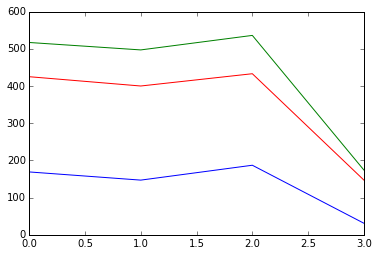

In [157]:
for elem in lista:
    dfPrint=df3[df3.Destination==elem]
    plt.plot(dfPrint.Date)
    
plt.show()

mismo ejercicio pivotando el dataFrame
    BCN   MAD   AGP
mes

In [161]:
df3.pivot('mes','Destination','Date')

Destination,AGP,BCN,MAD
mes,,,
1,169,517,425
2,147,497,400
3,187,536,433
4,31,174,147


In [162]:
dfPivot=df3.pivot('mes','Destination','Date')

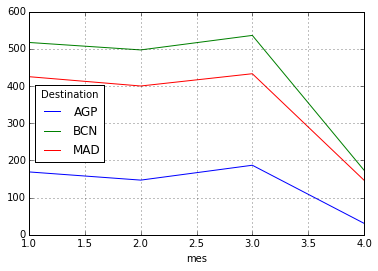

In [166]:
dfPivot.plot(grid=True)

# Great!!! si pasas un dataFrame a plot te pinta cada columna

In [167]:
del df

In [168]:
del df2